In [1]:
import pandas as pd
import numpy as np
import pickle
from src.preprocessing.utils_preprocessing import PreProcessingPipe
import matplotlib.pyplot as plt
import matplotlib as mpl 

mpl.rcParams["figure.dpi"] = 200

Let's build the FAR and FRR and analyze the best threshold to use for this model

# FAR

We need the test dataset when those values are Fraud.

In [ ]:
# data
fraud_df = pd.read_csv("data/second-eda-output.csv")
fraud_df["day_of_month"] = fraud_df["day_of_month"].astype(str)

# Pre-processing Pipeline
pre_processing_pipe = PreProcessingPipe(dataset=fraud_df)
pre_processing_pipe.train_test_splitting(
    sample_test_size=0.40, to_drop=["is_fraud"]
)
pre_processing_pipe.one_hot_encoder(["day_of_month", "type"])

# x_test and y_test
x_test = pre_processing_pipe.X_test
y_test = pre_processing_pipe.y_test

# sample with 100 observations
fraud_transformed_data = pd.concat([x_test, y_test], axis=1)
not_fraud_100 = fraud_transformed_data[fraud_transformed_data["is_fraud"] == 0].sample(100).drop(['is_fraud'], axis=1)

In [ ]:
# model
model_path = ["models/21_01_22_lr_w_v2.sav", "models/21_01_22_lr_w_v3.sav", "models/21_01_22_lr_w_v1.sav", "models/19_01_22_lr_w_v1.sav", "models/lrc_baseline.sav"]

for model in model_path[:1]:
    with open(model, "rb") as f:
            model = pickle.load(f)

    # far
    y_hat_class = model.predict(not_fraud_100)
    y_hat_prob = model.predict_proba(not_fraud_100)
    probs = list(y_hat_prob[:, 1]*100)
    probs_int = [int(prob) for prob in probs]

    probs_real_int = []
    for i, yhat in enumerate(yhat_class):
        if not_fraud_w_hat["is_fraud"].values[i] != yhat:
            probs_real_int.append(probs_int[i])

    # apply the threshold and save how many observations passes
    far = []
    threshold = []
    for i in range(100):
        num = 0
        for value in probs_int:
            if value > i:
                num += 1
        far.append(num)
        threshold.append(i)

    far = np.array(far)

    # frr
    fraud_100_w_hat = fraud_transformed_data[
        fraud_transformed_data["is_fraud"] == 1
    ].sample(100)
    fraud_100 = fraud_100_w_hat.drop(["is_fraud"], axis=1)

    yhat_class = model.predict(fraud_100)
    print(yhat_class)
    yhat_prob = model.predict_proba(fraud_100)
    probs = list(yhat_prob[:, 0] * 100)
    probs_int = [int(prob) for prob in probs]

    probs_real_int = []
    for i, yhat in enumerate(yhat_class):
        if fraud_100_w_hat["is_fraud"].values[i] != yhat:
            probs_real_int.append(probs_int[i])

    frr = []
    for i in range(100):
        num = 0

        for x in probs_real_int:
            if x < i:
                num += 1
        # print(i,num)
        frr.append(num)


    frr = np.array(frr)


    plt.plot(threshold, frr, '--b')
    plt.xlabel('threshold')
    plt.title('FRR')
    plt.axis([0, 100, 0, 100])
    plt.show()

    plt.plot(threshold,far,'--r')
    plt.xlabel('threshold')
    plt.title('FAR')

    plt.axis([5, 20, 0, 100])
    plt.show()
    fig, ax = plt.subplots()

    ax.plot(threshold, far, 'r--', label='FAR')
    ax.plot(threshold, frr, 'g--', label='FRR')
    plt.xlabel('Threshold')
    plt.axvline(x=50, ymin=0, ymax=40)

    legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

    # Put a nicer background color on the legend.
    legend.get_frame().set_facecolor('C0')

    plt.show()



In [30]:
y_test["is_fraud"].values

array([0, 0, 0, ..., 0, 0, 0])

RandomForestClassifier(n_jobs=-1)


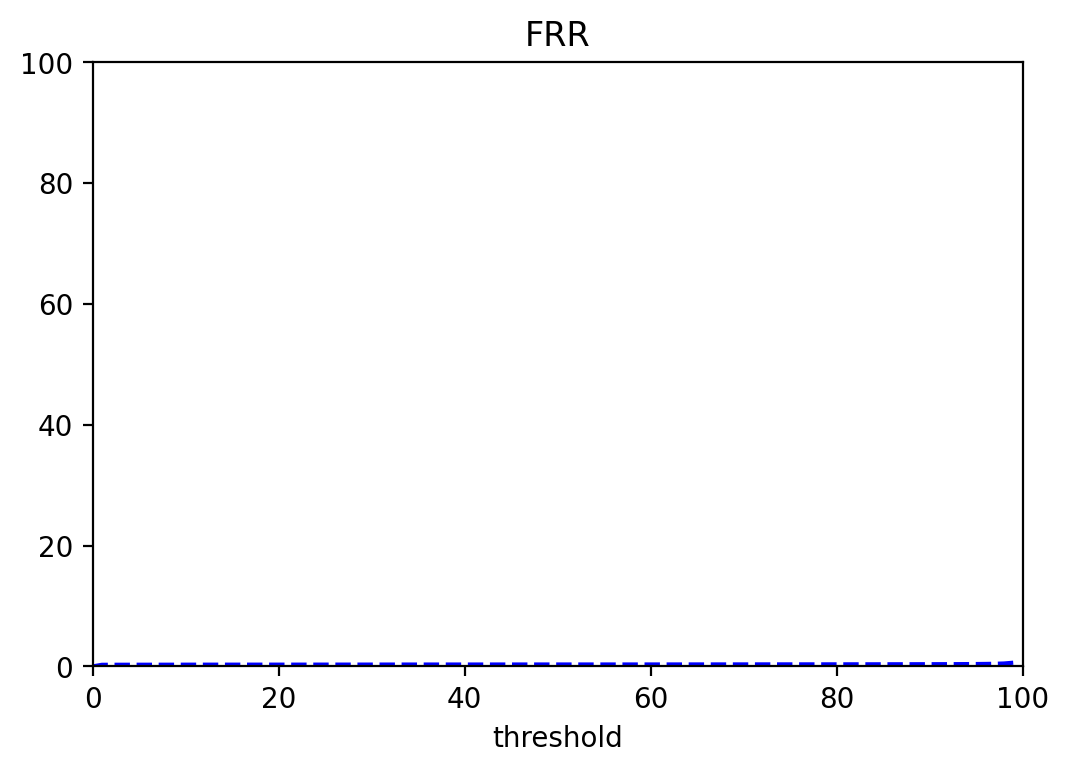

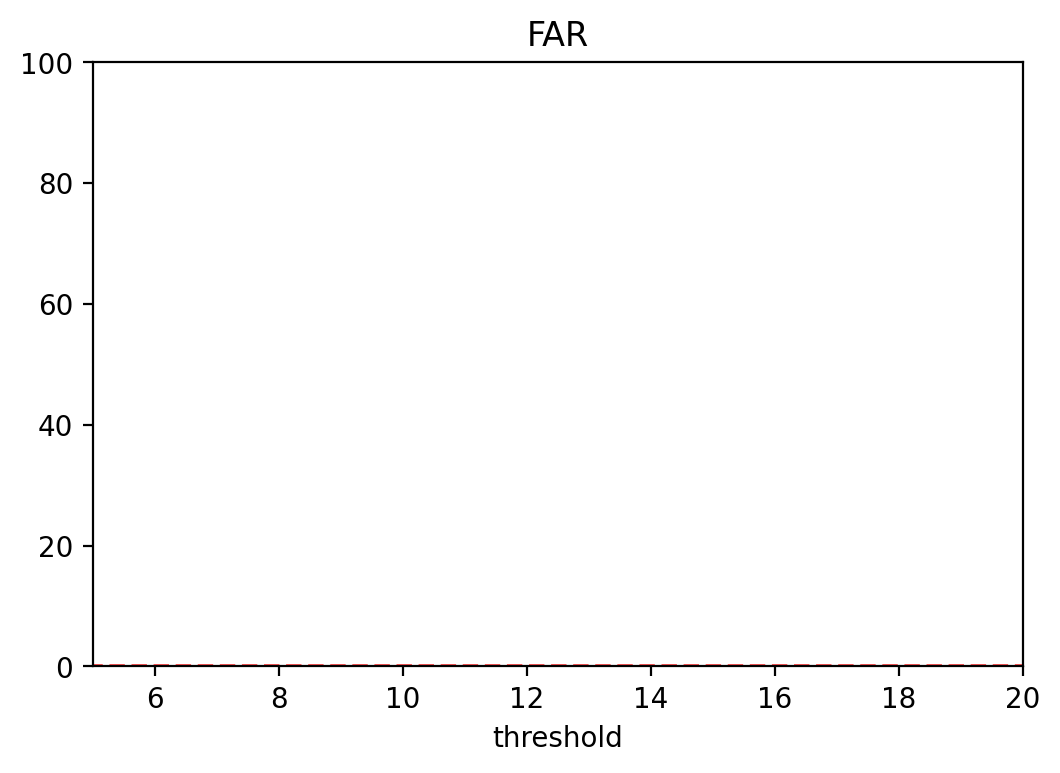

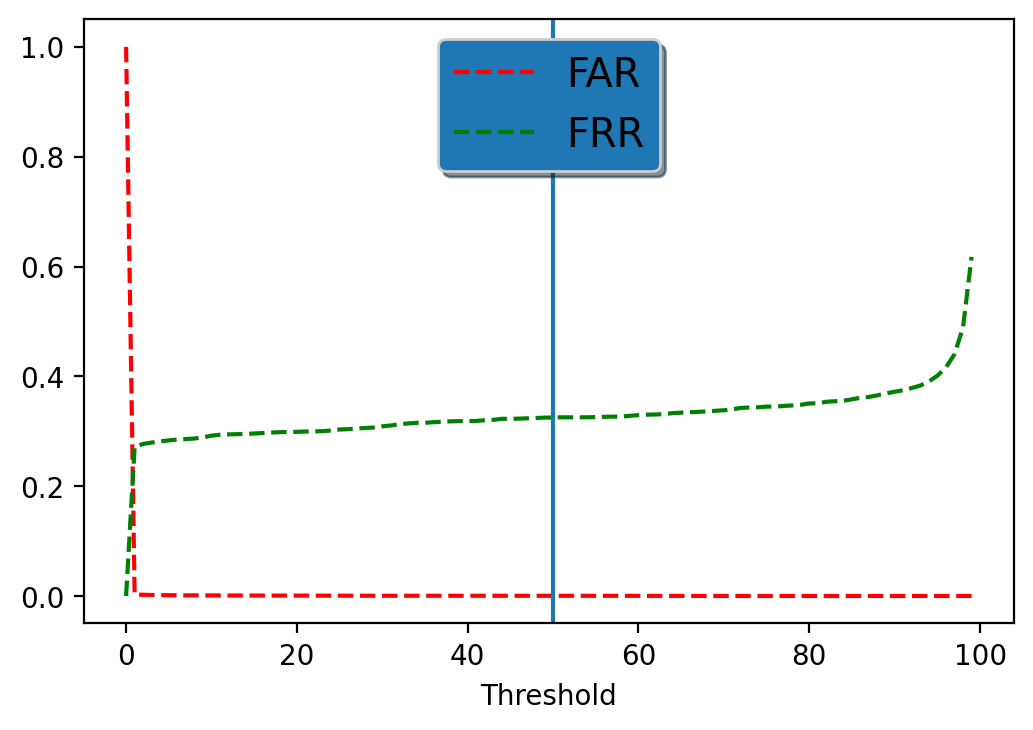

In [80]:
# model
model_path = ["models/21_01_22_lr_w_v3.sav", "models/21_01_22_lr_w_v1.sav", "models/19_01_22_lr_v1.sav"]

for model in model_path[:1]:
    with open(model, "rb") as f:
            model = pickle.load(f)
            print(model)

    # y_hat_class = model.predict(x_test)
    y_hat_prob = model.predict_proba(x_test)

    threshold, frr, far = calculate_far_frr(y_proba=y_hat_prob[:, 1], y_true=y_test["is_fraud"], normalize=True)

    threshold = list(range(0, 100))

    plt.plot(threshold, frr, '--b')
    plt.xlabel('threshold')
    plt.title('FRR')
    plt.axis([0, 100, 0, 100])
    plt.show()    

    plt.plot(threshold,far,'--r')
    plt.xlabel('threshold')
    plt.title('FAR')    
    plt.axis([5, 20, 0, 100])
    plt.show()
    
    fig, ax = plt.subplots()    
    ax.plot(threshold, far, 'r--', label='FAR')
    ax.plot(threshold, frr, 'g--', label='FRR')
    plt.xlabel('Threshold')
    plt.axvline(x=50, ymin=0, ymax=40)    
    legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')    
    # Put a nicer background color on the legend.
    legend.get_frame().set_facecolor('C0')    
    plt.show()


ValueError: x, y, and format string must not be None

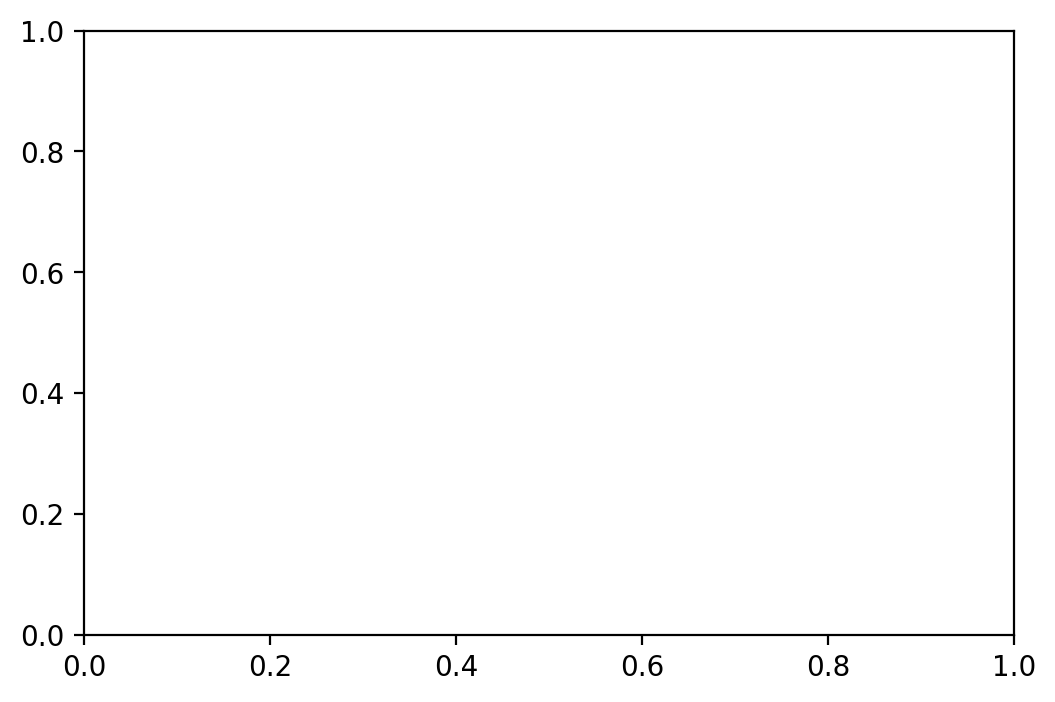

In [40]:
plt.plot(threshold, frr, '--b')
plt.xlabel('threshold')
plt.title('FRR')
plt.axis([0, 100, 0, 100])
plt.show()

plt.plot(threshold,far,'--r')
plt.xlabel('threshold')
plt.title('FAR')

plt.axis([5, 20, 0, 100])
plt.show()
fig, ax = plt.subplots()

ax.plot(threshold, far, 'r--', label='FAR')
ax.plot(threshold, frr, 'g--', label='FRR')
plt.xlabel('Threshold')
plt.axvline(x=50, ymin=0, ymax=40)

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()

In [78]:
def calculate_far_frr(y_proba, y_true, n_points=100, normalize=False, threshold=None):
    thr = np.linspace(0, 1, n_points)
    far = []
    frr = []
    for t in thr:
        far_pt = y_proba[y_true == 0] >= t
        frr_pt = y_proba[y_true == 1] < t
        if normalize:
            far.append(far_pt.mean())
            frr.append(frr_pt.mean())
        else:
            far.append(far_pt.sum())
            frr.append(frr_pt.sum())

    if threshold is None:
        far = np.array(far)
        frr = np.array(frr)
        optm = thr[abs(far - frr).argmin()]
    else:
        optm = threshold

    return threshold, frr, far


In [63]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(probas_pred=y_hat_prob[:, 1], y_true=y_test["is_fraud"].values)

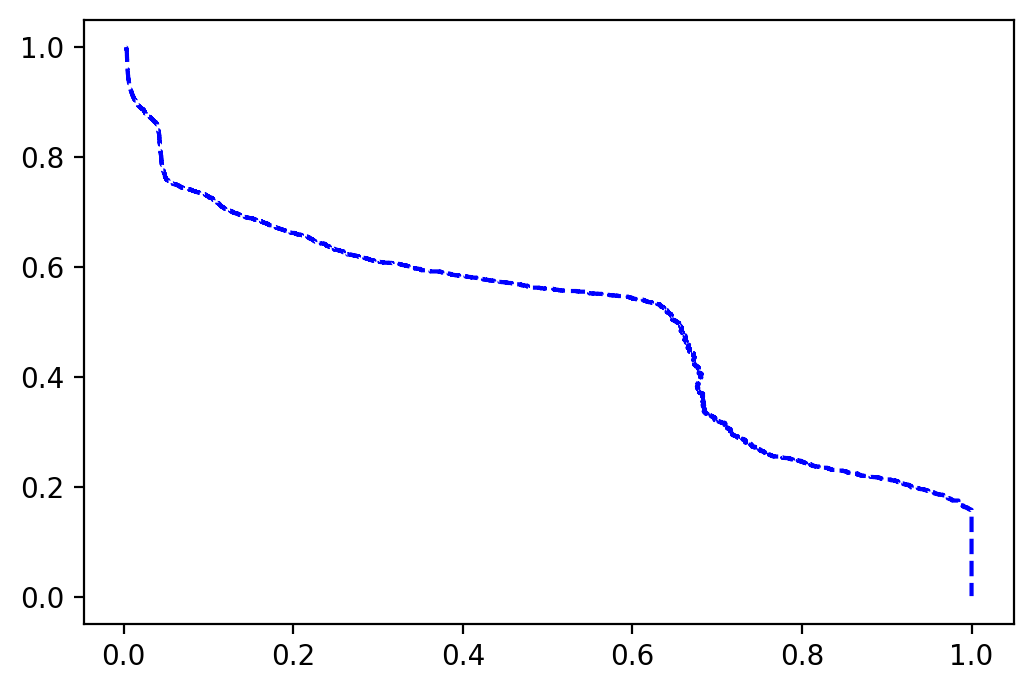

In [72]:
plt.plot(precisions[:-1], recalls[:-1], 'b--', label="precision")
plt.show()


In [95]:
def get_error(cod: int) -> str:
    cods = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    messages = [
        "Error during read of the image header, "
        "Please, verify the image quality and "
        "send again.",
        "Error during read of the snippets. "
        "Please, verify the image quality and "
        "send again.",
        "Error during read of discursive snippets. "
        "Please, verify the image quality and "
        "send again.",
        "Error during read of essay snippet, "
        "Please, verify the image quality and "
        "send again.",
        "Error during read of the horizontal snippets, "
        "Please, verify the image quality and "
        "send again.",
        "Error during read of the vertical snippets, "
        "Please, verify the image quality and "
        "send again.",
        "Not able to read the image",
        "Not able to read qrcode",
        "Invalid qrcode",
        "QR code referencing another database",
        "Error during read of marks, "
        "Please, verify the image quality and "
        "send again.",
        "Please, verify the image quality and send again"
    ]

    errors_df = pd.DataFrame({"codes": cods, "messages": messages})

    message = errors_df[errors_df["codes"] == cod]["messages"].values[0]
    errors_df.to_csv("error_matrix.csv", index=False)
    
    return message

error_df = get_error(10)

In [92]:
error_df[error_df["codes"] == 1]["messages"].values[0]

'Error during read of the image header, Please, verify the image quality and send again.'

In [94]:
error_df

,codes,messages
0,1,"Error during read of the image header, Please,..."
1,2,"Error during read of the snippets. Please, ver..."
2,3,Error during read of discursive snippets. Plea...
3,4,"Error during read of essay snippet, Please, ve..."
4,5,"Error during read of the horizontal snippets, ..."
5,6,"Error during read of the vertical snippets, Pl..."
6,7,Not able to read the image
7,8,Not able to read qrcode
8,9,Invalid qrcode
9,10,QR code referencing another database


In [3]:
with open("models/encoder_21_01_22_lr_w_v3", "rb") as f:
    encoder = pickle.load(f)
# apply the encoder
encoder

OneHotEncoder(variables=['day_of_month', 'type'])